In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_excel("C:/Users/Youngju Hong/Documents/projectfile/2019 서울서베이 자료.xlsx")

In [18]:
data

,date,id,sq1,sq1_1,sq2,sq3,sq4_1,sq4_2,sq5,sq6,...,q19,q20_1,q20_2,q21,q22,q23,q24_1,q24_2,RWT,RWT1
0,20200527,1,1,NaN,3,1998,2,0,4,4,...,1,2,3.0,10,NaN,NaN,6,2.0,59.447999,0.381985
1,20200527,2,2,NaN,3,1998,2,4,4,3,...,1,3,2.0,10,NaN,NaN,6,2.0,69.394611,0.445897
2,20200527,3,2,NaN,3,1991,3,7,4,3,...,3,2,3.0,10,NaN,NaN,6,2.0,69.394611,0.445897
3,20200527,4,2,NaN,3,1992,2,4,6,4,...,1,8,3.0,10,NaN,NaN,6,2.0,69.394611,0.445897
4,20200527,5,2,NaN,3,1993,4,5,6,5,...,1,2,6.0,10,NaN,NaN,6,2.0,69.394611,0.445897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,20200527,2496,1,NaN,1,1979,2,3,4,4,...,2,1,4.0,5,1.0,4.0,4,1.0,80.174320,0.515162
2496,20200527,2497,1,NaN,1,1981,4,3,4,4,...,3,2,3.0,5,1.0,4.0,4,1.0,70.172754,0.450897
2497,20200527,2498,1,NaN,1,1978,2,4,1,3,...,2,1,4.0,8,1.0,6.0,4,1.0,80.174320,0.515162
2498,20200527,2499,1,NaN,1,1969,1,4,3,4,...,2,1,5.0,4,1.0,4.0,3,1.0,2094.469875,13.458078


In [19]:
data = data[data["sq1"].apply(lambda x: True if x in [1,2,3,4,5,7,8] else False) | data["sq1_1"].apply(lambda x: True if x == 152 else False)]

In [20]:
nation = {1: "조선족", 2: "중국인", 3: "일본", 4: "타이완", 5:"베트남", 7:"미국", 8:"캐나다"}
data["sq1"] = data["sq1"].apply(lambda x: nation[x])

C:\Users\Youngju Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data["sq1"] = data["sq1"].astype("category")

C:\Users\Youngju Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data["sq1"].unique()

[조선족, 중국인, 미국, 타이완, 일본, 베트남, 캐나다]
Categories (7, object): [조선족, 중국인, 미국, 타이완, 일본, 베트남, 캐나다]

In [8]:
data["hospital_neg"] = data["q5_10"].apply(lambda x: "Hard" if x>3 else "Okay")

C:\Users\Youngju Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
data["hospital_neg"]

0       Hard
1       Hard
2       Hard
3       Hard
4       Okay
        ... 
2495    Okay
2496    Okay
2497    Hard
2498    Hard
2499    Okay
Name: hospital_neg, Length: 2136, dtype: object

In [118]:
hospital_grouped = data.groupby(["sq1", "hospital_neg"]).count().reset_index().iloc[:,:3]

In [121]:
hospital_grouped.to_excel("result.xlsx")

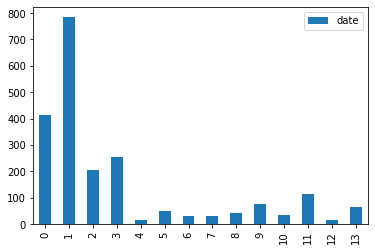

In [122]:
hospital_grouped.plot(kind = "bar")

In [10]:
q23 = data.groupby(["1.국적", "문23. 월평균 근로소득"]).count().reset_index()

KeyError: '1.국적'

In [23]:
data["nation"] = data["sq1"].apply(lambda x: "중국인" if x == "조선족" else x)

C:\Users\Youngju Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
for i in ["중국인", "미국", "타이완", "일본", "베트남", "캐나다"]:
    print(i, data[data["nation"] == i].loc[:, "q23"].value_counts())#plot(kind = "bar"))

중국인 4.0     519
5.0     370
6.0     145
3.0     114
7.0      82
9.0      22
2.0      13
8.0       9
11.0      7
10.0      6
1.0       2
13.0      2
16.0      1
15.0      1
12.0      1
Name: q23, dtype: int64
미국 5.0     27
6.0     15
7.0     14
14.0    11
15.0     9
12.0     8
13.0     7
11.0     5
16.0     4
4.0      4
8.0      3
18.0     2
17.0     2
10.0     2
2.0      1
Name: q23, dtype: int64
타이완 7.0     13
4.0     12
5.0     12
6.0      8
9.0      1
10.0     1
8.0      1
Name: q23, dtype: int64
일본 5.0     9
4.0     9
6.0     5
7.0     4
11.0    3
3.0     3
2.0     1
9.0     1
12.0    1
10.0    1
8.0     1
Name: q23, dtype: int64
베트남 5.0     27
6.0     17
4.0      7
10.0     5
9.0      1
8.0      1
7.0      1
3.0      1
2.0      1
Name: q23, dtype: int64
캐나다 5.0     9
9.0     8
8.0     7
6.0     4
10.0    4
4.0     3
13.0    3
11.0    3
7.0     3
12.0    2
15.0    2
16.0    2
17.0    2
14.0    1
Name: q23, dtype: int64


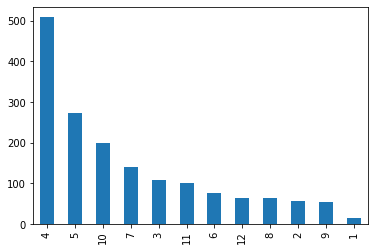

중국인 4     509
5     274
10    200
7     139
3     108
11    100
6      76
12     65
8      64
2      57
9      53
1      14
Name: q21, dtype: int64
중국인sum:  1659


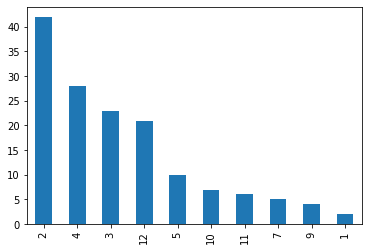

미국 2     42
4     28
3     23
12    21
5     10
10     7
11     6
7      5
9      4
1      2
Name: q21, dtype: int64
미국sum:  148


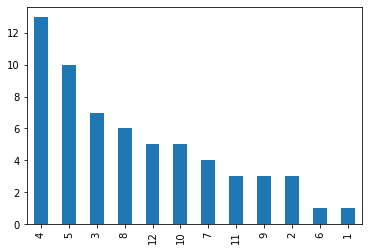

타이완 4     13
5     10
3      7
8      6
12     5
10     5
7      4
11     3
9      3
2      3
6      1
1      1
Name: q21, dtype: int64
타이완sum:  61


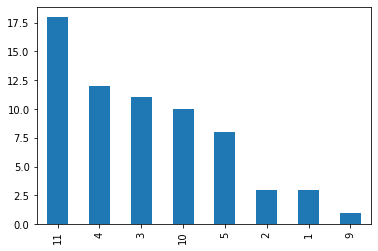

일본 11    18
4     12
3     11
10    10
5      8
2      3
1      3
9      1
Name: q21, dtype: int64
일본sum:  66


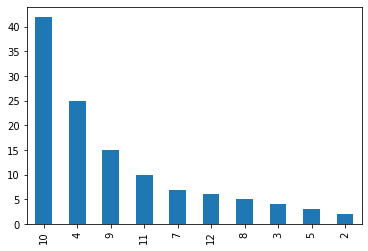

베트남 10    42
4     25
9     15
11    10
7      7
12     6
8      5
3      4
5      3
2      2
Name: q21, dtype: int64
베트남sum:  119


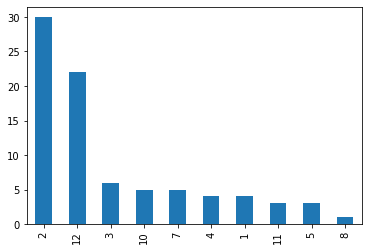

캐나다 2     30
12    22
3      6
10     5
7      5
4      4
1      4
11     3
5      3
8      1
Name: q21, dtype: int64
캐나다sum:  83


In [145]:
for i in ["중국인", "미국", "타이완", "일본", "베트남", "캐나다"]:
    fig, ax = plt.subplots()
    data[data["nation"] == i].loc[:, "q21"].value_counts().plot(kind = "bar")
    plt.show()
    print(i, data[data["nation"] == i].loc[:, "q21"].value_counts())#plot(kind = "bar"))
    print(i+"sum: ", data[data["nation"] == i].loc[:, "q21"].value_counts().sum())

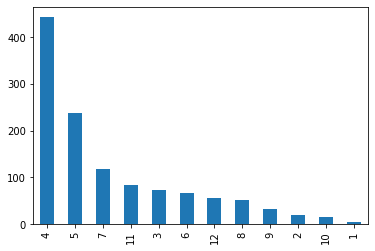

조선족 4     443
5     238
7     117
11     83
3      72
6      66
12     55
8      51
9      33
2      20
10     15
1       5
Name: q21, dtype: int64
조선족sum:  1198


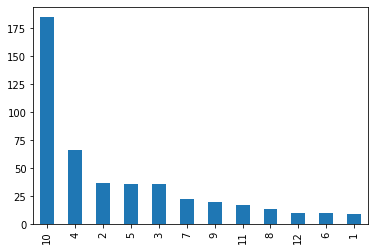

중국인 10    185
4      66
2      37
5      36
3      36
7      22
9      20
11     17
8      13
12     10
6      10
1       9
Name: q21, dtype: int64
중국인sum:  461


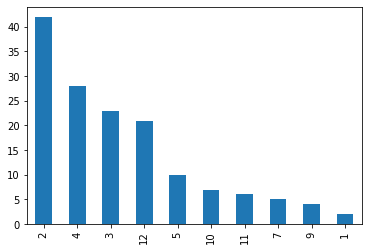

미국 2     42
4     28
3     23
12    21
5     10
10     7
11     6
7      5
9      4
1      2
Name: q21, dtype: int64
미국sum:  148


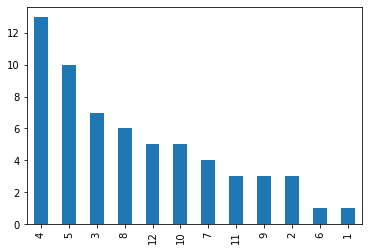

타이완 4     13
5     10
3      7
8      6
12     5
10     5
7      4
11     3
9      3
2      3
6      1
1      1
Name: q21, dtype: int64
타이완sum:  61


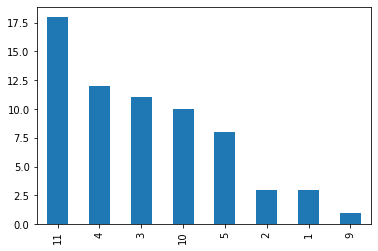

일본 11    18
4     12
3     11
10    10
5      8
2      3
1      3
9      1
Name: q21, dtype: int64
일본sum:  66


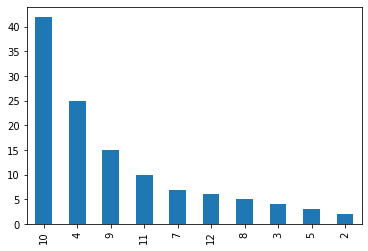

베트남 10    42
4     25
9     15
11    10
7      7
12     6
8      5
3      4
5      3
2      2
Name: q21, dtype: int64
베트남sum:  119


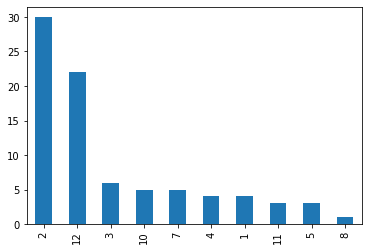

캐나다 2     30
12    22
3      6
10     5
7      5
4      4
1      4
11     3
5      3
8      1
Name: q21, dtype: int64
캐나다sum:  83


In [149]:
for i in ["조선족", "중국인", "미국", "타이완", "일본", "베트남", "캐나다"]: #직업 분포 (조선족 포함)
    fig, ax = plt.subplots()
    data[data["sq1"] == i].loc[:, "q21"].value_counts().plot(kind = "bar")
    plt.show()
    print(i, data[data["sq1"] == i].loc[:, "q21"].value_counts())#plot(kind = "bar"))
    print(i+"sum: ", data[data["sq1"] == i].loc[:, "q21"].value_counts().sum())

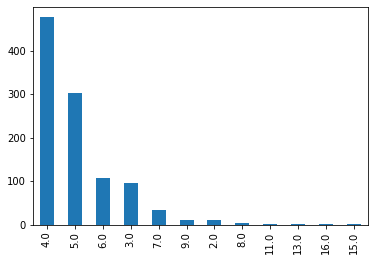

조선족 4.0     476
5.0     303
6.0     108
3.0      95
7.0      34
9.0      10
2.0      10
8.0       4
11.0      2
13.0      1
16.0      1
15.0      1
Name: q23, dtype: int64
조선족sum:  1045


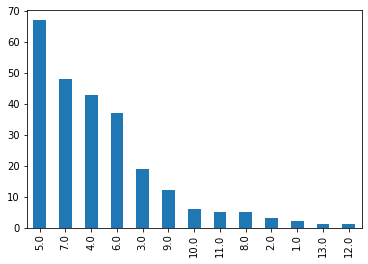

중국인 5.0     67
7.0     48
4.0     43
6.0     37
3.0     19
9.0     12
10.0     6
11.0     5
8.0      5
2.0      3
1.0      2
13.0     1
12.0     1
Name: q23, dtype: int64
중국인sum:  249


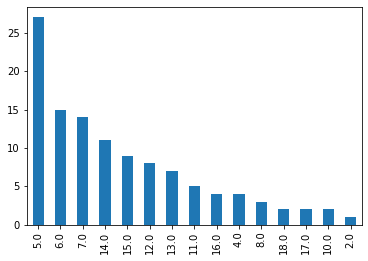

미국 5.0     27
6.0     15
7.0     14
14.0    11
15.0     9
12.0     8
13.0     7
11.0     5
16.0     4
4.0      4
8.0      3
18.0     2
17.0     2
10.0     2
2.0      1
Name: q23, dtype: int64
미국sum:  114


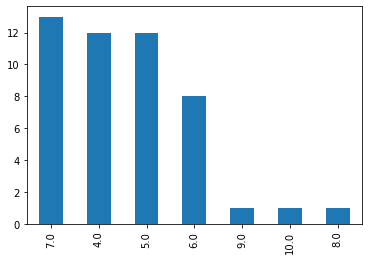

타이완 7.0     13
4.0     12
5.0     12
6.0      8
9.0      1
10.0     1
8.0      1
Name: q23, dtype: int64
타이완sum:  48


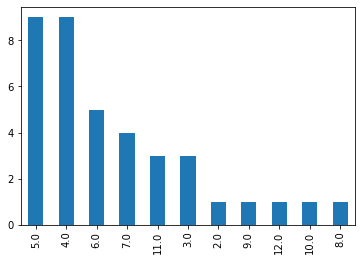

일본 5.0     9
4.0     9
6.0     5
7.0     4
11.0    3
3.0     3
2.0     1
9.0     1
12.0    1
10.0    1
8.0     1
Name: q23, dtype: int64
일본sum:  38


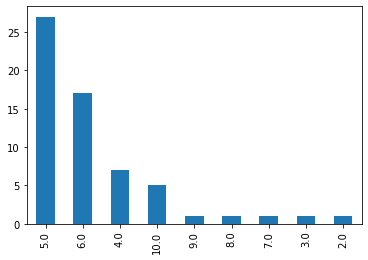

베트남 5.0     27
6.0     17
4.0      7
10.0     5
9.0      1
8.0      1
7.0      1
3.0      1
2.0      1
Name: q23, dtype: int64
베트남sum:  61


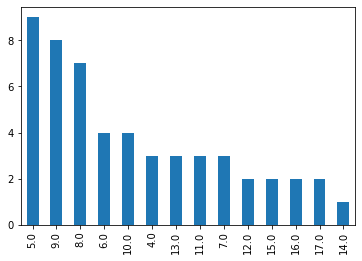

캐나다 5.0     9
9.0     8
8.0     7
6.0     4
10.0    4
4.0     3
13.0    3
11.0    3
7.0     3
12.0    2
15.0    2
16.0    2
17.0    2
14.0    1
Name: q23, dtype: int64
캐나다sum:  53


In [159]:
for i in ["조선족", "중국인", "미국", "타이완", "일본", "베트남", "캐나다"]: #직업 분포 (조선족 포함)
    fig, ax = plt.subplots()
    data[data["sq1"] == i].loc[:, "q23"].value_counts().plot(kind = "bar")
    plt.show()
    print(i, data[data["sq1"] == i].loc[:, "q23"].value_counts())#plot(kind = "bar"))
    print(i+"sum: ", data[data["sq1"] == i].loc[:, "q23"].value_counts().sum())

In [157]:
for i in ["중국인", "미국", "타이완", "일본", "베트남", "캐나다"]:
    print(i, data[data["sq1"] == i].loc[:, "q23"].mean())
    print(i+"sum: ", data[data["sq1"] == i].loc[:, "q21"].value_counts().sum())

중국인 5.694779116465863
중국인sum:  461
미국 9.210526315789474
미국sum:  148
타이완 5.708333333333333
타이완sum:  61
일본 5.842105263157895
일본sum:  66
베트남 5.639344262295082
베트남sum:  119
캐나다 8.981132075471699
캐나다sum:  83


In [161]:
print(data[data["sq1"] == "미국"].loc[:, "q23"].mean())
print(data[data["sq1"] != "미국"].loc[:, "q23"].mean())

9.210526315789474
5.041499330655957


In [36]:
for i in ("조선족", "중국인", "타이완", "베트남", "일본", "미국", "캐나다"):
    print("-"*5, i, "-"*5)
    for j in range(1,11):
        print(f"Question {j}")
        temp = data[data["sq1"] == i].loc[:,f"q5_{j}"]#.value_counts())
        
        print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

----- 조선족 -----
Question 1
0.2262103505843072
Question 2
0.4073455759599332
Question 3
0.2629382303839733
Question 4
0.2846410684474123
Question 5
0.31636060100166946
Question 6
0.35308848080133554
Question 7
0.3397328881469115
Question 8
0.4048414023372287
Question 9
0.3547579298831386
Question 10
0.34474123539232054
----- 중국인 -----
Question 1
0.4685466377440347
Question 2
0.7136659436008677
Question 3
0.3080260303687636
Question 4
0.4598698481561822
Question 5
0.45770065075921906
Question 6
0.48156182212581344
Question 7
0.44685466377440347
Question 8
0.5075921908893709
Question 9
0.4121475054229935
Question 10
0.44685466377440347
----- 타이완 -----
Question 1
0.4918032786885246
Question 2
0.819672131147541
Question 3
0.36065573770491804
Question 4
0.22950819672131148
Question 5
0.4426229508196721
Question 6
0.4098360655737705
Question 7
0.4098360655737705
Question 8
0.4426229508196721
Question 9
0.4918032786885246
Question 10
0.47540983606557374
----- 베트남 -----
Question 1
0.36134453781

In [46]:
#의료 문제
for i in ("조선족", "중국인", "타이완", "베트남", "일본", "미국", "캐나다"):
    print("-"*5, i, "-"*5)
    temp = data[data["sq1"] == i].loc[:,f"q5_10"]#.value_counts())
    print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

----- 조선족 -----
0.34474123539232054
----- 중국인 -----
0.44685466377440347
----- 타이완 -----
0.47540983606557374
----- 베트남 -----
0.35294117647058826
----- 일본 -----
0.22727272727272727
----- 미국 -----
0.23648648648648649
----- 캐나다 -----
0.20481927710843373


In [62]:
#의료문제 (중화권)
temp = data[data["sq1"].apply(lambda x: True if x in ("타이완", "중국") else False)].loc[:,"q5_10"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x < 3 else False)]) / len(temp))

0.21311475409836064


In [65]:
#언어문제 (중화권)
temp = data[data["sq1"].apply(lambda x: True if x in ("타이완", "중국") else False)].loc[:,"q5_1"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.4918032786885246


In [67]:
#의료문제 (비중화권)
temp = data[data["sq1"].apply(lambda x: True if x not in ("타이완", "중국", "조선족") else False)].loc[:,"q5_10"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.35917901938426455


In [68]:
#언어문제 (비중화권)
temp = data[data["sq1"].apply(lambda x: True if x not in ("타이완", "중국", "조선족") else False)].loc[:,"q5_1"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.39110604332953247


In [38]:
#타이완, 중국, 베트남인 교육 문제 겪는 비율
temp = data[data["sq1"].apply(lambda x: True if x in ("타이완", "중국", "베트남") else False)].loc[:,"q5_2"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.8


In [41]:
#미국, 일본, 캐나다, 조선족 교육 문제 겪는 비율
temp = data[data["sq1"].apply(lambda x: True if x in ("미국", "일본", "캐나다", "조선족") else False)].loc[:,"q5_2"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.42474916387959866


In [42]:
#타이완, 중국, 베트남인 언어 문제 겪는 비율
temp = data[data["sq1"].apply(lambda x: True if x in ("타이완", "중국", "베트남") else False)].loc[:,"q5_1"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.40555555555555556


In [43]:
#미국, 일본, 캐나다, 조선족 교육 문제 겪는 비율
temp = data[data["sq1"].apply(lambda x: True if x in ("미국", "일본", "캐나다", "조선족") else False)].loc[:,"q5_1"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.23745819397993312


In [44]:
#타이완, 중국, 베트남인 차별 문제 겪는 비율
temp = data[data["sq1"].apply(lambda x: True if x in ("타이완", "중국", "베트남") else False)].loc[:,"q5_5"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.48333333333333334


In [45]:
#미국, 일본, 캐나다, 조선족 차별 문제 겪는 비율
temp = data[data["sq1"].apply(lambda x: True if x in ("미국", "일본", "캐나다", "조선족") else False)].loc[:,"q5_5"]#.value_counts())        
print(len(temp[temp.apply(lambda x: True if x > 3 else False)]) / len(temp))

0.2782608695652174
